# Oceanic Niño Index (ONI)
NOAA’s primary indicator for monitoring ENSO.
Download data: https://psl.noaa.gov/data/correlation/oni.data

In [20]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.io import write_image
import statsmodels.api as sm


In [2]:
col_names = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
df_oni = pd.read_csv('https://psl.noaa.gov/data/correlation/oni.data', sep='\s+', skiprows=1, names=col_names) 
df_oni = df_oni.apply(pd.to_numeric, errors='coerce')
df_oni.dropna(inplace=True)
df_oni.replace({-99.90 : np.NaN}, inplace=True)
df_oni = df_oni.drop(df_oni.tail(3).index) #working with data until 2021.

<>:2: SyntaxWarning:

invalid escape sequence '\s'

<>:2: SyntaxWarning:

invalid escape sequence '\s'

C:\Users\cb3910\AppData\Local\Temp\ipykernel_363580\1422780740.py:2: SyntaxWarning:

invalid escape sequence '\s'



In [ ]:
fig = px.imshow(df_oni.T,
                color_continuous_scale='RdBu_r',
                title='Oceanic Niño Index',
                labels=dict(x="Year", y="Month", color="ONI"),
                aspect='auto')

#write_image(fig, 'FigureONI_month.svg', scale=1) 

fig.show()

In [3]:
df_oni =  df_oni.reset_index().rename(columns={'index': 'YR'})

In [4]:
df_oni = pd.melt(df_oni, id_vars=['YR'], 
                    var_name='MON', 
                    value_name='ANOM')

# Map months names to numbers
month_map = {'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6, 
             'July': 7, 'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December': 12}

df_oni['MON'] = df_oni['MON'].map(month_map)

# Sort by year and month for a cleaner look
df_oni = df_oni.sort_values(by=['YR', 'MON']).reset_index(drop=True)


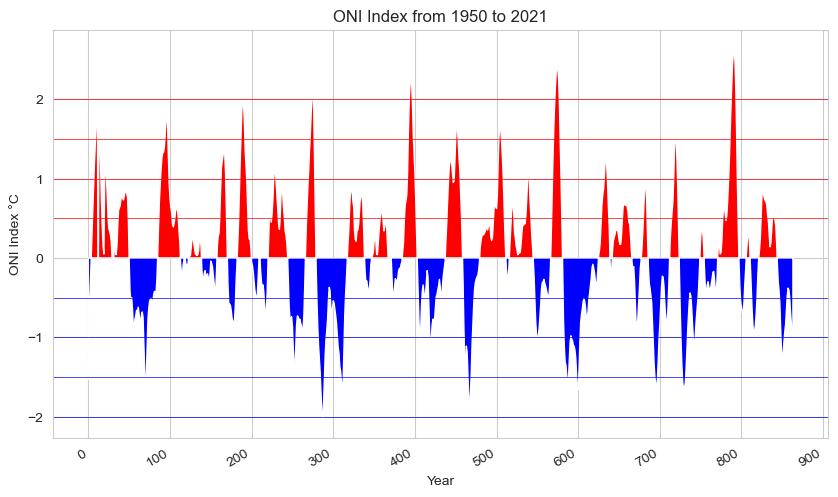

In [5]:
# Set up the figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the ONI index (Anomalies) over time
ax.fill_between(df_oni.index, df_oni['ANOM'], 0, where=(df_oni['ANOM'] >= 0), facecolor='red', interpolate=True, label='El Niño')
ax.fill_between(df_oni.index, df_oni['ANOM'], 0, where=(df_oni['ANOM'] < 0), facecolor='blue', interpolate=True, label='La Niña')

# Add labels, titles, and grid
ax.set_title("ONI Index from 1950 to 2021")
ax.set_ylabel("ONI Index °C")
ax.set_xlabel("Year")
ax.grid(True)

#Add horizontal lines for thresholds (e.g., Weak, Moderate, Strong)
ax.axhline(0.5, color='red', lw=0.5)
ax.axhline(1.0, color='red', lw=0.5)
ax.axhline(1.5, color='red', lw=0.5)
ax.axhline(2.0, color='red', lw=0.5)

ax.axhline(-0.5, color='blue', lw=0.5)
ax.axhline(-1.0, color='blue', lw=0.5)
ax.axhline(-1.5, color='blue', lw=0.5)
ax.axhline(-2.0, color='blue', lw=0.5)
# Format the x-axis to show the years
ax.xaxis.set_major_locator(plt.MaxNLocator()) 
fig.autofmt_xdate()

# Show the plot
plt.show()

In [6]:
ONI_year = df_oni.groupby(['YR']).mean()
ONI_year = ONI_year.reset_index()
ONI_year["YR"] = ONI_year["YR"].astype(int)

In [7]:
ONI_year

,YR,MON,ANOM
0,1950,6.5,0.522500
1,1951,6.5,0.741667
2,1952,6.5,0.174167
3,1953,6.5,0.713333
4,1954,6.5,-0.400833
...,...,...,...
67,2017,6.5,-0.204167
68,2018,6.5,0.006667
69,2019,6.5,0.487500
70,2020,6.5,-0.359167


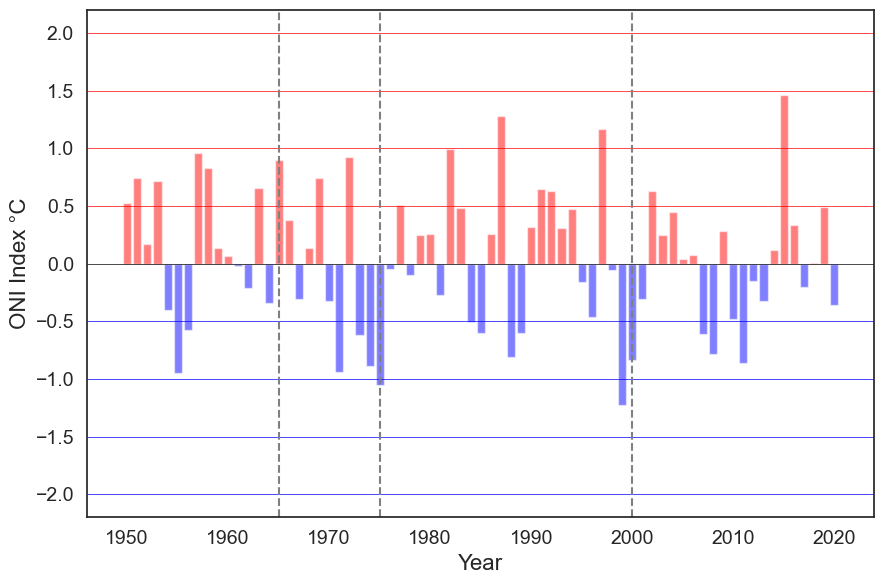

In [8]:
years = list(range(1950, 2021))
anomalies = ONI_year["ANOM"]

sns.set(style="white",
        rc={"font.family": "sans-serif", "font.sans-serif": ["Arial", "Helvetica", "Verdana", "Trebuchet MS"]})

fig, ax = plt.subplots(figsize=(9, 6))

for year, anomalies in zip(years, anomalies):
    if anomalies > 0:
        color = 'red'
    else:
        color = 'blue'

    ax.bar(year, anomalies, color=color, alpha=0.5)

# Add horizontal lines for thresholds (e.g., Weak, Moderate, Strong)
ax.axhline(0.5, color='red', lw=0.5)
ax.axhline(1.0, color='red', lw=0.5)
ax.axhline(1.5, color='red', lw=0.5)
ax.axhline(2.0, color='red', lw=0.5)
ax.axhline(0, color='black', lw=0.5)
ax.axhline(-0.5, color='blue', lw=0.5)
ax.axhline(-1.0, color='blue', lw=0.5)
ax.axhline(-1.5, color='blue', lw=0.5)
ax.axhline(-2.0, color='blue', lw=0.5)

plt.axvline(x=1965, color='grey', linestyle='--')
plt.axvline(x=1975, color='grey', linestyle='--')
plt.axvline(x=2000, color='grey', linestyle='--')


# Set labels and title
ax.set_xlabel('Year', fontsize=16)
ax.set_ylabel('ONI Index °C', fontsize=16)
ax.tick_params(axis='x', labelsize=14)
ax.tick_params(axis='y', labelsize=14)


# Rotate x-axis labels for better readability
#plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()
#plt.savefig('FigureONI.tiff', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
## Correlation with PRECIP

In [10]:
PRECIP = pd.read_csv(r'G:\My Drive\Doutorado\TESE\2. Artigo 2\Artigo Pantanal - LULCC\Codes\pantanal-lc\2024_reviews\Data\merged_Precip.csv', usecols=['hydro_year', 'Precip_basin'])

In [12]:
df = pd.merge(ONI_year, PRECIP, left_on='YR', right_on='hydro_year')

In [13]:
df

,YR,MON,ANOM,hydro_year,Precip_basin
0,1951,6.5,0.741667,1951,1703.110293
1,1952,6.5,0.174167,1952,1567.427573
2,1953,6.5,0.713333,1953,1426.372978
3,1954,6.5,-0.400833,1954,1378.111283
4,1955,6.5,-0.948333,1955,1183.404460
...,...,...,...,...,...
66,2017,6.5,-0.204167,2017,1219.694359
67,2018,6.5,0.006667,2018,1349.154932
68,2019,6.5,0.487500,2019,1173.942484
69,2020,6.5,-0.359167,2020,993.332654


<Figure size 800x600 with 0 Axes>

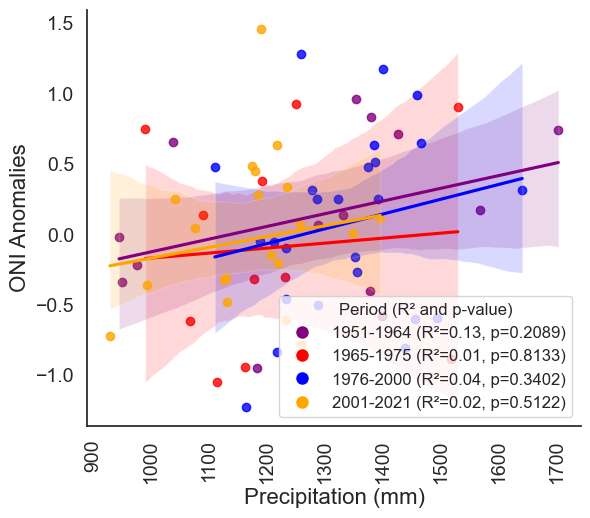

In [25]:
# Plot lmplot for each period
plt.figure(figsize=(8, 6))  # Adjust the figure size here

# Divide the dataset into three periods
periods = pd.cut(df['hydro_year'], bins=[1950, 1964, 1975, 2000, 2022], labels=['1951-1964','1965-1975', '1976-2000', '2001-2021'])
df['Period'] = periods

# Initialize a dictionary to store R-squared and p-values for each period
rsquared_pvalue_dict = {}

# Initialize a list to store legend handles
legend_handles = []

palette = ["purple", "red", 'blue', 'orange']
# Define a unique set of colors and markers for the legend handles
unique_colors = sns.color_palette(palette, len(df['Period'].unique()))
markers = ['o', 'o', 'o', 'o']  # You can choose any marker styles you prefer

g = sns.lmplot(x="Precip_basin", y="ANOM", data=df, hue='Period', palette=["purple", "red", 'blue', 'orange'],
               height=5, aspect=1.2)

# Iterate through each period to fit a linear regression model and calculate R-squared and p-value
for i, period in enumerate(df['Period'].unique()):
    subset = df[df['Period'] == period]
    X = sm.add_constant(subset['Precip_basin'])
    model = sm.OLS(subset['ANOM'], X).fit()
    rsquared = model.rsquared
    p_value = model.f_pvalue  # This calculates the p-value for the overall model
    rsquared_pvalue_dict[period] = (rsquared, p_value)

    # Create a legend handle with the appropriate color and marker
    legend_handles.append(plt.Line2D([0], [0], marker=markers[i], color='w', markerfacecolor=unique_colors[i],
                                     markersize=10, label=f'{period} (R²={rsquared:.2f}, p={p_value:.4f})'))
g._legend.remove()

# Set axis labels
plt.xlabel('Precipitation (mm)', fontsize=16)
plt.ylabel('ONI Anomalies', fontsize=16)

#plt.xlim(700, 1800)
#plt.ylim(0, 300)

# Increase the x and y-axis tick label font sizes
plt.xticks(fontsize=14, rotation=90)
plt.yticks(fontsize=14)

# Create a legend outside the lmplot with a specified title fontsize
plt.legend(title="Period (R² and p-value)", handles=legend_handles, loc='lower right', fontsize=12, title_fontsize=12)
#plt.savefig('Figure.tiff', dpi=300, bbox_inches='tight')
plt.show()